In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from useful_functions_with_batch import *
from opt_function_with_batch import *
from opt_function import *
from network_utils import *
import matplotlib.pyplot as plt

In [84]:
def get_xinmeng_matrix(n=5):
    M = np.zeros((n, n))

    # 主对角线上的元素
    M[np.diag_indices(n)] = 1 / 3 * np.ones(n)
    M[n - 1, n - 1] = M[n - 1, n - 1] + 1 / 3

    # 次对角线上的元素
    for i in range(n - 1):
        M[i + 1, i] = M[i + 1, i] + 1 / 3

    # 第一行上的元素
    M[0, :] = M[0, :] + 1 / 3

    return M

In [85]:
d=4
L_total=20480
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)
print("h:",h_global.shape)
print("y:",y_global.shape)

h: (20480, 4)
y: (20480,)


In [86]:
n = 10
A = get_xinmeng_matrix(n).T
show_row(A)

A的第二大特征值: 0.3333333333332895
A的beta: 0.7938912496123449
A的spectral gap: 0.20610875038765508
A的kappa: 256.00000000002655
S_A是: 200.8422095188803 



In [87]:
n=8
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 1
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L1 = PullDiag_GT(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=5e-3,
    sigma_n=1e-5,
    max_it=5000,
)

A的第二大特征值: 0.3333333333333332
A的beta: 0.7872742301568818
A的spectral gap: 0.2127257698431182
A的kappa: 64.0000000000016
S_A是: 137.1862455322629 

h_tilde: (8, 2560, 4) 



In [88]:
n=8
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A= get_xinmeng_matrix(n=n).T
k = 30
A = np.linalg.matrix_power(A, k)
show_row(A)
print("h_tilde:",h_tilde.shape,'\n')
L2 = PullDiag_GT(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=5e-3,
    sigma_n=1e-5,
    max_it=5000,
)

A的第二大特征值: 0.9999999999999989
A的beta: 2.374435195751127e-08
A的spectral gap: 0.9999999762556481
A的kappa: 64.00000000000001
S_A是: 29.18305038567014 

h_tilde: (8, 2560, 4) 



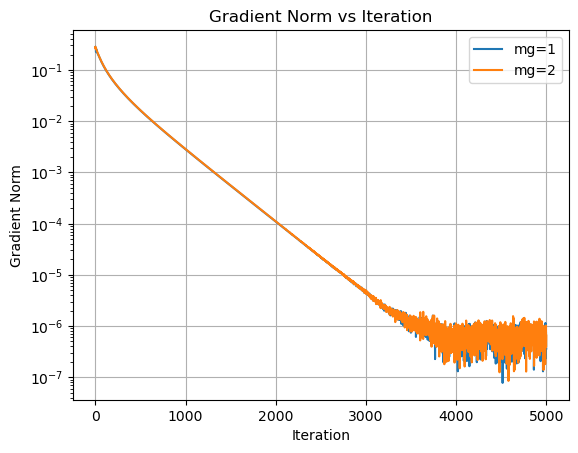

In [89]:
plt.semilogy(L1['gradient_norm'], label='mg=1')
plt.semilogy(L2['gradient_norm'], label='mg=2')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')
plt.grid()
plt.show()